## Image Compression Using K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
original_img = plt.imread("sunflower_image.jpg")
print(original_img.shape)
    # First 2 dimension shows size of image
    # third dimension shows R-G-B encoded values at that position

X = (np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3)))/255
    # for .jpg files, plt.imread() reads image and assign values from 0-255.Dividing by 255 squeezes all values between 0&1
    # for .png files, plt.imread() reads image and assign values from 0-1 already
    
    # every row in X describes R-G-B value for that particular pixel
print(X.shape)

(3712, 5568, 3)
(20668416, 3)


In [3]:
k_means = KMeans(
    n_clusters=16,                                                                   # EDIT n_clusters HERE DEPENDING ON HOW COMPRESSED IMAGE YOU WANT
    init='k-means++',   # <-- this is the key line
    max_iter=100,       # max iterations
    tol=1e-4,           # tolerance
    random_state=42
)


In [4]:
# Fit KMeans
k_means.fit(X)

# Centroids
centroids = k_means.cluster_centers_
K = centroids.shape[0]
print("Centroids:\n", centroids)

# Cluster index for each sample
idx = k_means.labels_
print("\nCluster indices (idx):\n", idx)

Centroids:
 [[0.92517391 0.65134818 0.00400483]
 [0.746217   0.8455922  0.947916  ]
 [0.32819541 0.24623532 0.01009324]
 [0.64546498 0.48701917 0.0049127 ]
 [0.5315885  0.66174822 0.76176179]
 [0.57666391 0.59107347 0.3202182 ]
 [0.77701062 0.76308372 0.41922737]
 [0.52031064 0.41935538 0.01172955]
 [0.98709389 0.78729994 0.00496139]
 [0.12898582 0.27842742 0.18138913]
 [0.79789661 0.56556251 0.00488668]
 [0.30688128 0.49825794 0.60914087]
 [0.44676689 0.31371187 0.00844862]
 [0.2053942  0.13661581 0.0083802 ]
 [0.23075813 0.38529054 0.3089822 ]
 [0.67704974 0.80469929 0.93740209]]

Cluster indices (idx):
 [ 9  9  9 ... 13 13 13]


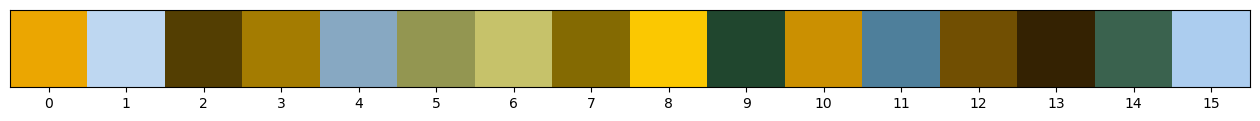

In [5]:
def show_centroid_colors(centroids):
    K = centroids.shape[0]
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(K, K))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

show_centroid_colors(centroids)

In [6]:
# Replace each pixel with the color of the closest centroid
X_compressed = centroids[idx, :] 

# Reshape image into proper dimensions
X_compressed = np.reshape(X_compressed, original_img.shape) 

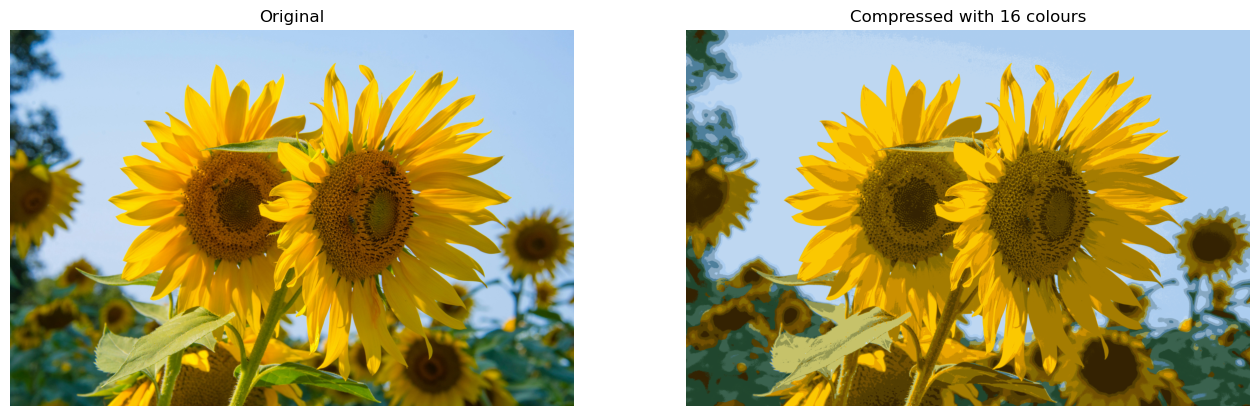

In [7]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

# Comment-out if want to save.
# # Save figure to file with K in filename
# plt.tight_layout()
# plt.savefig(f"comp_{K}.png", dpi=300, bbox_inches='tight')

plt.show()